# Overview

### This notebook contains exploratory data analysis on user-item interaction, Fitness Blender workouts, and Youtube video data.

In [1]:
# import
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.preprocessing import MinMaxScaler

# no warnings
import warnings
warnings.filterwarnings('ignore')

# import toppo
sys.path.insert(0, '../src/models')
from top_popular import top_popular

In [2]:
!ls ../data/*.csv

'ls' is not recognized as an internal or external command,
operable program or batch file.


# User Item Interaction
### After filtering out infrequent users (with < 5 comments), `75% of the users have interacted with less than 15 workouts`.
### The user item interaction count is `heavily right-skewed`.

In [3]:
interactions = pd.read_csv('../data/preprocessed/user_item_interactions.csv')
interactions.sample(5)

,user_id,workout_id
34875,2692,393
26586,2019,250
13665,1036,373
9817,725,138
46396,3587,152


In [4]:
user_item_count = interactions.groupby('user_id').count().reset_index()
user_item_count = user_item_count[user_item_count['workout_id'] >= 5]
user_item_count.sample(5)

,user_id,workout_id
48,49,8
3580,3581,13
3897,3898,13
3800,3801,10
3687,3688,26


### Some basic stats and graph

In [5]:
user_item_count['workout_id'].describe()

count    3792.000000
mean       13.495517
std        15.809252
min         5.000000
25%         6.000000
50%         8.000000
75%        14.000000
max       304.000000
Name: workout_id, dtype: float64

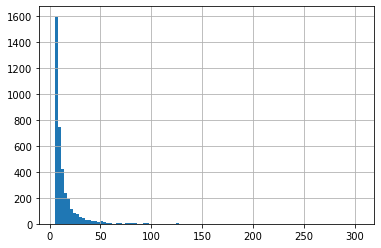

In [6]:
user_item_count['workout_id'].hist(bins=100);

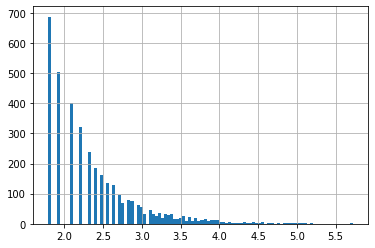

In [7]:
# took the log to make the chart more obvious
pd.Series(np.log1p(user_item_count['workout_id'])).hist(bins=100);

# FB Workouts

In [8]:
workouts = pd.read_csv('../data/raw/fbworkouts.csv')
workouts.sample(5)

,workout_id,duration,calorie_burn,difficulty,equipment,training_type,body_focus,youtube_link
152,153,36 Minutes,213-355,4,Dumbbell,"Low Impact, Pilates, Strength Training, Toning",Lower Body,https://www.youtube.com/watch?v=EgMttbIO3-s
556,557,10 Minutes,65-110,5,"Mat, No Equipment","Strength Training, Toning",Core,https://www.youtube.com/watch?v=3DNN9a5pU2A
503,504,26 Minutes,104-208,3,No Equipment,"Barre, Low Impact, Toning","Lower Body, Core",https://www.youtube.com/watch?v=6_9iWo9UbbY
519,520,23 Minutes,156-220,3,Dumbbell,"Barre, Low Impact, Toning",Upper Body,https://www.youtube.com/watch?v=BsK1vYxZQM8
358,359,18 Minutes,119-255,5,Jump Rope,"Cardiovascular, HIIT",Total Body,https://www.youtube.com/watch?v=f1gyy46tm-U


In [9]:
# cleaning
workouts['duration'] = workouts['duration'].str.replace(' Minutes', '').astype(int)
workouts['calorie_burn'] = workouts['calorie_burn'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1]))/2)

### Duration
### `75% workouts span less than 30 minutes, with a peak at 10 minutes.`

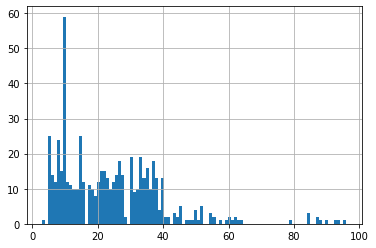

In [10]:
workouts['duration'].hist(bins=100);

In [11]:
workouts['duration'].describe()

count    580.000000
mean      23.974138
std       15.750681
min        3.000000
25%       10.000000
50%       22.000000
75%       33.000000
max       96.000000
Name: duration, dtype: float64

### Calorie Burn
### `The majority is light to medium workout.`

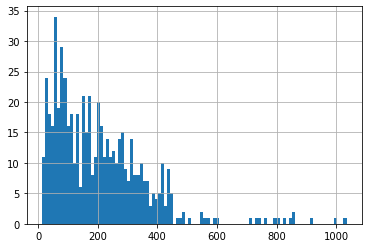

In [12]:
workouts['calorie_burn'].hist(bins=100);

In [13]:
workouts['calorie_burn'].describe()

count     580.000000
mean      204.650000
std       157.598112
min        13.500000
25%        82.875000
50%       173.250000
75%       282.875000
max      1035.000000
Name: calorie_burn, dtype: float64

### Difficulty
### `Difficulty is slightly left skewed, focusing mostly medium hard workouts.`

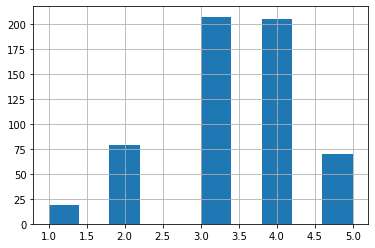

In [14]:
workouts['difficulty'].hist(bins=10);

In [15]:
workouts['difficulty'].describe()

count    580.000000
mean       3.393103
std        0.974965
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: difficulty, dtype: float64

### Equipment
### `Most do not require Equipment and some require a mat and dumbells.`

In [16]:
equipment_count = defaultdict(int)

for i in workouts['equipment']:
    equipments = i.split(', ')
    for e in equipments:
        equipment_count[e] += 1
equipment_count

defaultdict(int,
            {'Bench': 30,
             'Dumbbell': 180,
             'Kettlebell': 24,
             'Jump Rope': 9,
             'No Equipment': 412,
             'Mat': 153,
             'Exercise Band': 13,
             'Medicine Ball': 7,
             'Aerobics Step': 5,
             'Sandbag': 4,
             'Barbell': 3,
             'Physio-Ball': 15,
             'Stationary Bike': 1})

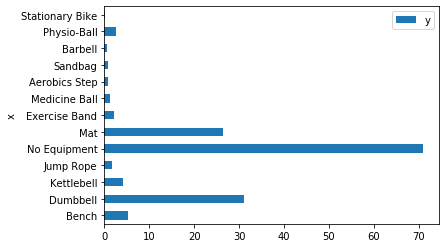

In [17]:
perc = [round(equipment_count[i]/len(workouts)*100, 1) for i in equipment_count]
pd.DataFrame({'x': [i for i in equipment_count], 'y': perc}).set_index('x').plot(kind='barh');

### Training Type
### `Most workouts are for toning, low impact workouts that help to build cardio. Less about building mass.`

In [18]:
type_count = defaultdict(int)

for i in workouts['training_type']:
    types = i.split(', ')
    for t in types:
        type_count[t] += 1
type_count

defaultdict(int,
            {'Strength Training': 198,
             'Kettlebell': 20,
             'Cardiovascular': 267,
             'HIIT': 155,
             'Stretching/Flexibility': 47,
             'Pilates': 56,
             'Toning': 439,
             'Low Impact': 228,
             'Balance/Agility': 21,
             'Warm Up/Cool Down': 46,
             'Barre': 25,
             'Plyometric': 32})

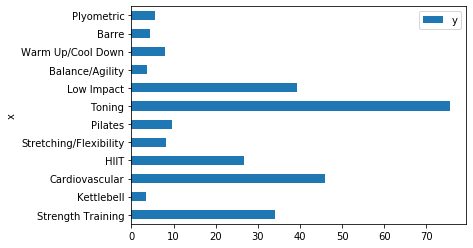

In [19]:
import matplotlib.pyplot as plt

perc = [round(type_count[i]/len(workouts)*100, 1) for i in type_count]
pd.DataFrame({'x': [i for i in type_count], 'y': perc}).set_index('x').plot(kind='barh');

### Body Focus
### `Focusing a lot on whole body (well-rounded health), lower body, and core. Less about upper body.`

In [20]:
workouts['body_focus']

0                   Upper Body
1                   Total Body
2      Lower Body,  Total Body
3                   Lower Body
4            Core,  Lower Body
                ...           
575                 Total Body
576    Total Body,  Lower Body
577                       Core
578                 Total Body
579                       Core
Name: body_focus, Length: 580, dtype: object

In [21]:
focus_count = defaultdict(int)

for i in workouts['body_focus']:
    focuses = i.replace('\xa0', ' ').split(',  ')
    for f in focuses:
        focus_count[f] += 1
focus_count

defaultdict(int,
            {'Upper Body': 93,
             'Total Body': 284,
             'Lower Body': 190,
             'Core': 148})

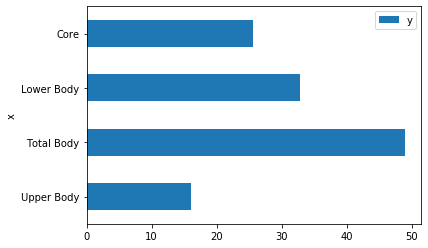

In [22]:
perc = [round(focus_count[i]/len(workouts)*100, 1) for i in focus_count]
pd.DataFrame({'x': [i for i in focus_count], 'y': perc}).set_index('x').plot(kind='barh');

# Youtube Video Data

In [23]:
youtube = pd.read_csv('../data/raw/workouts_yt.csv')
youtube.head()

,workout_id,title,published_at,view_count,like_count,dislike_count,comment_count
0,1,At Home Upper Body Strength Workout for People...,2020-11-08T17:03:38Z,117340,2476,18,146
1,2,45 Minute Total Body Kettlebell Workout - Fun ...,2019-06-16T16:32:06Z,532710,6275,112,274
2,3,Brutal 30 Minute HIIT Cardio Workout at Home,2020-10-19T14:43:11Z,237629,4721,74,362
3,4,Lower Body Active Stretch Routine - PNF Stretc...,2020-09-27T14:53:45Z,106300,2185,55,151
4,5,"10 Minute Abs, Butt and Thigh Workout - Pilate...",2020-07-27T14:13:24Z,297743,5818,67,195


### Views, Likes, Dislikes, and Comments
### The distribution of views, likes, dislikes, and comments are extremely `right skewed`. The median values of view, like, dislike, and comment counts are `777928.5`, `5778`, `123.5`, and `235` respectively.

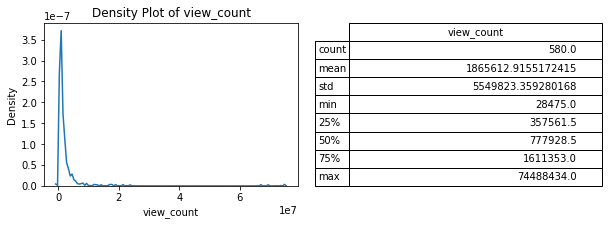

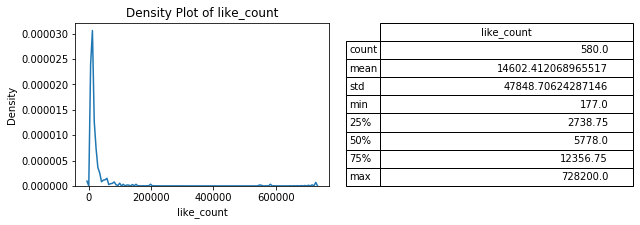

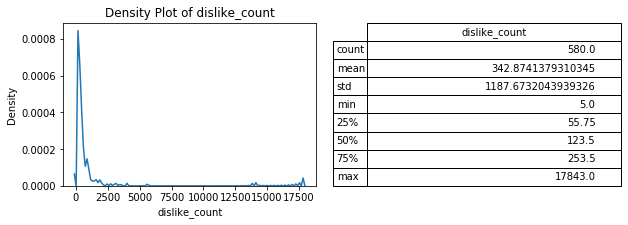

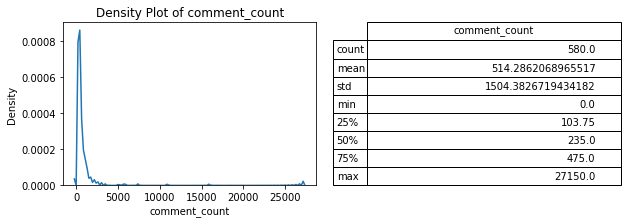

In [24]:
# density plots and tables with descriptive stats for views/likes/dislikes/comments 
for c in youtube.columns[3:]:
    fig = plt.figure(figsize=(10,3))
    ax1 = fig.add_subplot(121)
    sns.distplot(youtube[c], hist = False, ax=ax1)
    plt.title('Density Plot of ' + c)
    plt.ylabel('Density')
    
    ax2 = fig.add_subplot(122)
    df = youtube[c].describe().to_frame()
    ax2.axis('off')
    ax2.table(cellText = df.values, rowLabels = df.index, bbox=[0, 0, 1, 1], colLabels=df.columns)
    plt.show()

### Published Dates
### More workouts were published between 2011-2015 compared to 2015-2021.

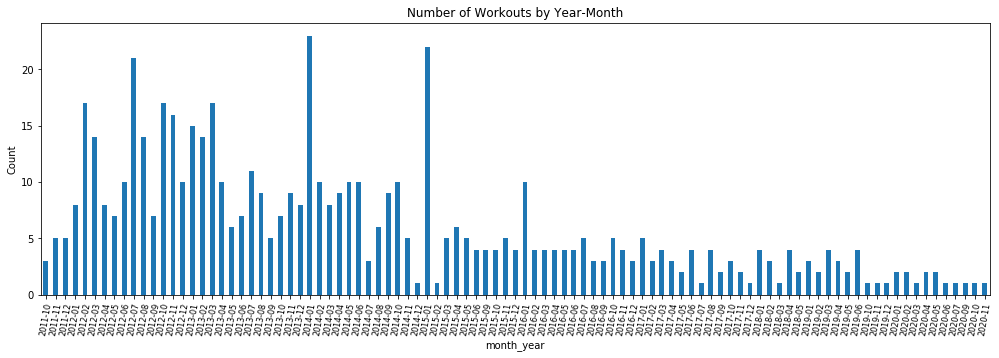

In [25]:
youtube['published_at'] = pd.to_datetime(youtube['published_at'])
fig = plt.figure(figsize=(17,5))
x = youtube.assign(month_year=youtube['published_at'].dt.to_period("M")).groupby('month_year').size()
x.plot('bar')
plt.xticks(rotation=80,fontsize=8)
plt.ylabel('Count')
plt.title('Number of Workouts by Year-Month')
plt.show()

### Published Dates and Top Popular
### There is moderate negative correlation between when videos are published and their score from the top popular model. In other words, older workout videos tend to be ranked lower.

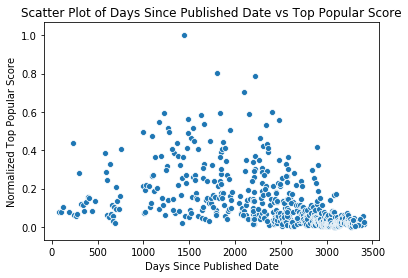

Correlation: -0.46634047551602753


In [26]:
# the number of days since the video was published on youtube
days_from_2021 = (pd.Timestamp.now(tz='UTC')-youtube['published_at']).dt.days

# get top popular scores and scale it to be between 0 and 1: higher score =
pred, scores = top_popular(interactions)
mms = MinMaxScaler()
norm_score = mms.fit_transform(scores.reshape(-1,1)).reshape(1,-1)[0]
scores_ordered = np.zeros(len(pred))
scores_ordered.put(pred-1, norm_score)

# plot scatter plot
sns.scatterplot(x=days_from_2021, y=scores_ordered)
plt.title('Scatter Plot of Days Since Published Date vs Top Popular Score')
plt.xlabel('Days Since Published Date')
plt.ylabel('Normalized Top Popular Score')
plt.show()
print("Correlation: " + str(pd.Series(scores_ordered).corr(days_from_2021)))